
# NAME : AMRESH MISHRA

## Task 3: Prediction using Decision Tree Algorithm
 a) Create the Decision Tree classifier and visualize it graphically.
 

# importing some required libraries 



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt


# Loading the dataset

In [2]:
df=pd.read_csv("iris_csv.csv")

# EDA

In [3]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [29]:
df.describe()  #statical analysis

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
import warnings
warnings.filterwarnings("ignore")   

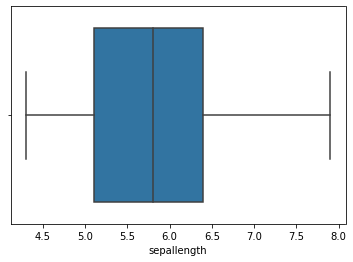

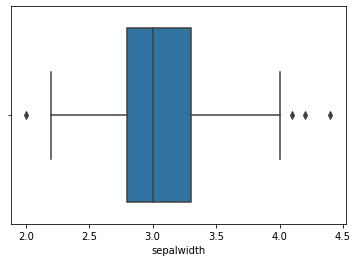

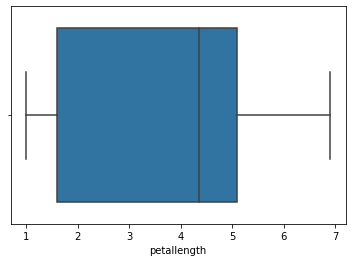

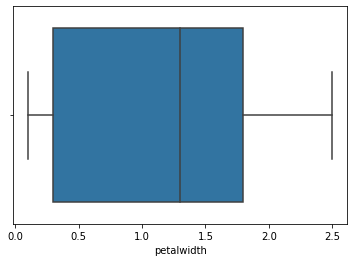

In [9]:
for x in df.columns:             #Boxplot
    if df[x].dtype !='object':
        sns.boxplot(df[x])
        plt.show()

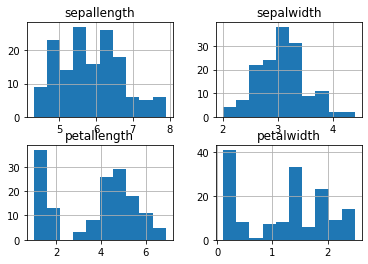

In [10]:
df.hist()  # Histogram
plt.show()

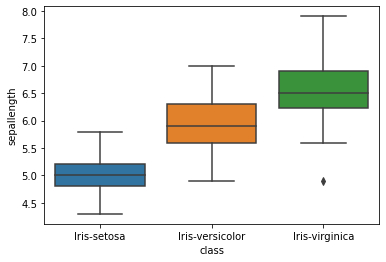

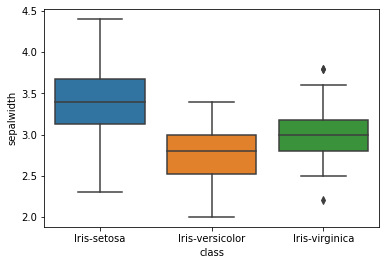

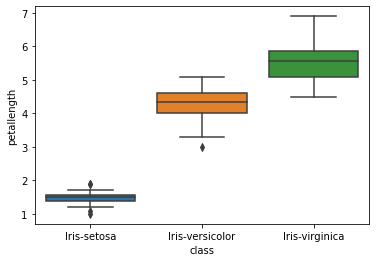

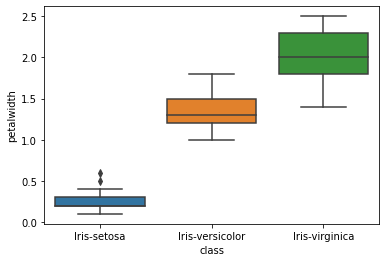

In [11]:
for x in df.columns:
    if df[x].dtypes != "object":
        sns.boxplot(df['class'],df[x])    
        plt.show()

# correlation 

             sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.109369     0.871754    0.817954
sepalwidth     -0.109369    1.000000    -0.420516   -0.356544
petallength     0.871754   -0.420516     1.000000    0.962757
petalwidth      0.817954   -0.356544     0.962757    1.000000


<AxesSubplot:>

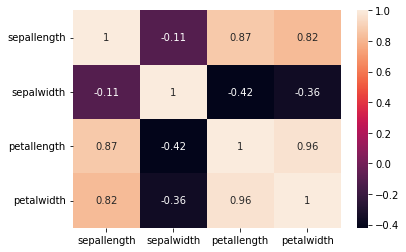

In [12]:
print(df.corr())
sns.heatmap(df.corr(),annot=True)

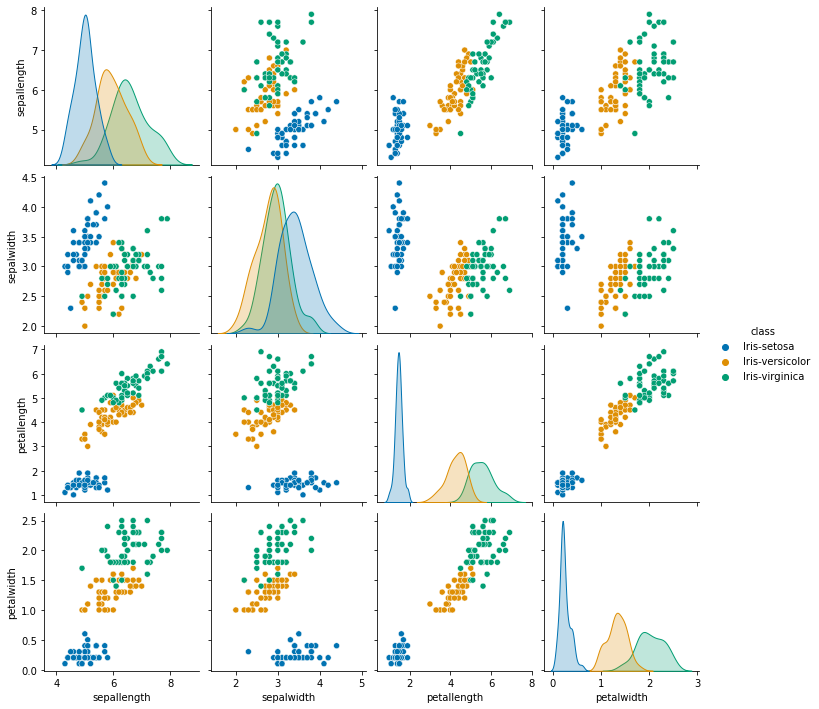

In [13]:
sns.pairplot(data=df, hue="class", palette='colorblind')


# Data Prepration 


In [14]:
X=df.drop('class', axis=1)
Y=df['class']


# splitting the data into taining and testing data set

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=80)

# Training the model

In [24]:
Dtree = DecisionTreeClassifier(criterion = "entropy",random_state =0)
model = Dtree.fit(x_train,y_train)
y_predict = Dtree.predict(x_test)


In [17]:
#saving the model
import pickle
pickle.dump(Dtree, open ('model.pkl', 'wb'))

# visualizing Decison Tree

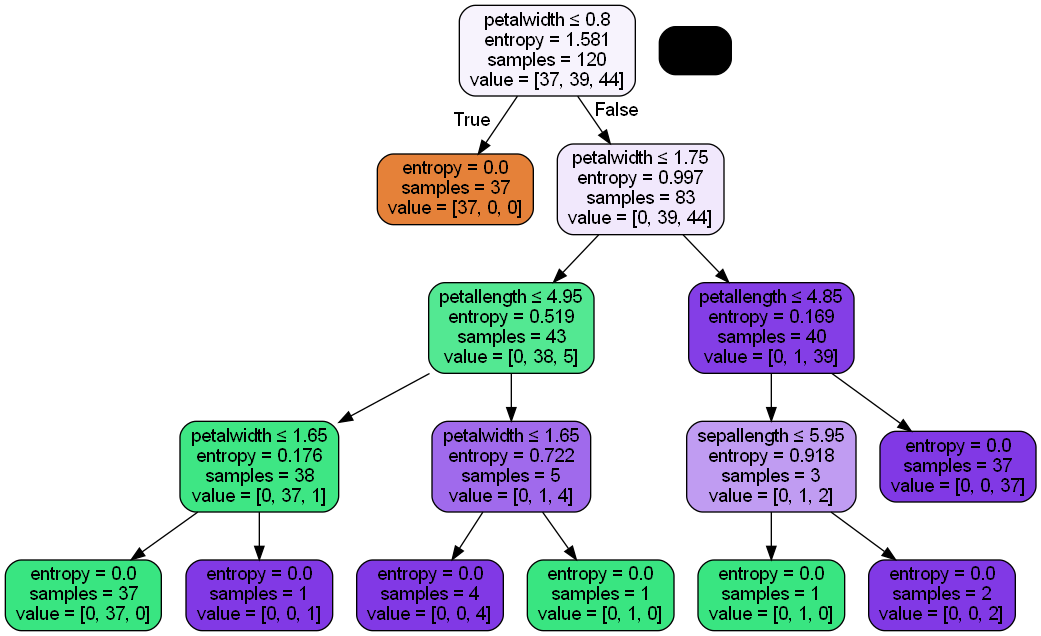

In [19]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(Dtree, out_file=dot_data, feature_names= df.columns.drop('class'),  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
     

# Model Evaluation

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



<AxesSubplot:>

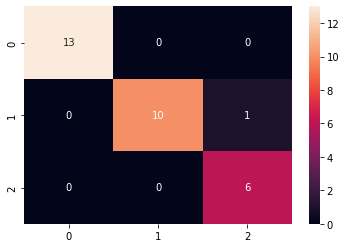

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),annot = True)
     

In [28]:
accuracy_score(y_test, y_predict)*100

96.66666666666667

# we have 96 % accuracy , so we not deploy current model


In [ ]:
Thank YOU